<a href="https://colab.research.google.com/github/Pgupta670/Diabetes-Risk-Prediction-ML-Model-Insights-Dashboard/blob/main/BUS5PR1_Assignment3_Activity_1_Predicting_Diabetes_Risk_(ML_Prediction_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUS5PR1 Assignment3: Predicting Diabetes Risk Model

# 1. Introduction

Diabetes is one of the most pressing global health concerns, and early identification of individuals at risk is essential for timely intervention and prevention. This notebook focuses on developing a predictive analytics solution that classifies individuals as diabetic or non-diabetic using a dataset containing key health and lifestyle indicators such as BMI, blood pressure, glucose levels, cholesterol, smoking history, and physical activity patterns. The goal is to transform raw health data into actionable insights through a combination of data preprocessing, exploratory data analysis (EDA), and machine learning modelling

# 2.Dataset Overview

The dataset used in this analysis contains health and lifestyle information aimed at predicting whether an individual is diabetic or non-diabetic.
It includes 21 independent features and 1 target variable (Diabetes_binary). The data captures various health indicators such as blood pressure, cholesterol level, physical activity, dietary habits, and general health status, collected from a large-scale health survey.

Each row represents a unique individual, while the features describe their physical, behavioral, and demographic attributes. The target variable (Diabetes_binary) is binary —
1 indicates that the individual is diabetic, and 0 indicates non-diabetic.

The dataset combines binary, categorical, and continuous variables, making it suitable for classification tasks using supervised machine learning models such as Logistic Regression, Random Forest, Gradient Boosting, and XGBoost.

# 3. Loading and Preparing the Data


This code imports essential Python libraries for data analysis and machine learning, sets a clean visualization style, and loads the training and testing datasets (data_train.csv and data_test.csv) into pandas DataFrames. It also displays basic dataset information and summary statistics.



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
%matplotlib inline

In [ ]:
##Loading training and test dataset
df = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')
df.info()  #Feature information
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170000 entries, 0 to 169999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    170000 non-null  int64  
 1   Diabetes_binary       170000 non-null  float64
 2   HighBP                170000 non-null  object 
 3   HighChol              170000 non-null  object 
 4   CholCheck             169089 non-null  object 
 5   BMI                   168901 non-null  float64
 6   Smoker                170000 non-null  object 
 7   Stroke                170000 non-null  object 
 8   HeartDiseaseorAttack  168814 non-null  object 
 9   PhysActivity          170000 non-null  object 
 10  Fruits                170000 non-null  object 
 11  Veggies               170000 non-null  object 
 12  HvyAlcoholConsump     170000 non-null  object 
 13  AnyHealthcare         170000 non-null  object 
 14  NoDocbcCost           170000 non-null  object 
 15  

,ID,Diabetes_binary,BMI,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income
count,170000.000000,170000.000000,168901.000000,170000.000000,170000.000000,170000.000000,169142.000000,169082.000000,169015.000000,170000.000000
mean,120001.576865,0.177153,28.525000,2.544218,3.228771,4.383247,0.443580,8.089992,5.036618,6.015288
std,57706.413918,0.381799,6.659961,1.077352,7.475427,8.860245,0.496808,3.036256,0.991862,2.087348
min,20000.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,70032.750000,0.000000,24.000000,2.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,120049.500000,0.000000,27.000000,2.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,169959.750000,0.000000,31.000000,3.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,219998.000000,1.000000,98.000000,5.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


Insights:
The dataset has around 170,000 records and 23 columns, showing a mix of numerical and categorical variables. This confirms the need for preprocessing steps like encoding and scaling before model training.

In [ ]:
 # Display basic information about the dataset
 print(f"Dataset shape: {df.shape}")
 print("\nFirst 5 rows of the dataset:")
 df.head()

Dataset shape: (170000, 23)

First 5 rows of the dataset:


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,96180,1.0,Yes,No,Yes,24.0,Yes,No,Yes,Yes,...,No,Yes,4.0,6.0,2.0,No,1.0,7.0,5.0,5.0
1,166219,0.0,Yes,No,Yes,24.0,No,No,No,Yes,...,Yes,No,3.0,0.0,0.0,No,0.0,11.0,6.0,5.0
2,33843,0.0,No,No,Yes,27.0,Yes,No,No,Yes,...,Yes,No,3.0,0.0,0.0,Yes,1.0,9.0,4.0,1.0
3,180956,0.0,No,No,Yes,26.0,No,No,No,Yes,...,Yes,No,1.0,0.0,5.0,No,0.0,6.0,6.0,8.0
4,176253,0.0,No,No,Yes,NaN,Yes,No,No,Yes,...,Yes,No,2.0,0.0,0.0,No,0.0,8.0,5.0,7.0


In [ ]:
# Check total number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


Below code is used to check null values in the dataset

In [ ]:
# Count of null values
df.isnull().sum()

,0
ID,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,911
BMI,1099
Smoker,0
Stroke,0
HeartDiseaseorAttack,1186
PhysActivity,0


This code separates numerical (BMI, Age) and categorical (CholCheck, Sex, Education, HeartDiseaseorAttack) columns. Missing values in numerical columns are filled using the median, while categorical ones are filled using the most frequent (mode) value. The final check ensures no missing values remain in the dataset.

In [ ]:
# Separate columns by type
num_cols = ['BMI', 'Age']
cat_cols = ['CholCheck', 'HeartDiseaseorAttack', 'Sex', 'Education']
#Handling missing values in Numerical Variables using Median Imputation method
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df[['BMI', 'Age']] = num_imputer.fit_transform(df[['BMI', 'Age']])

In [ ]:
#Handling missing values in Categorical Variables using Mode Imputation method
cat_cols = ['CholCheck', 'Sex', 'Education', 'HeartDiseaseorAttack']

from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')

df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [ ]:
# Verify no missing values remain
#Check if all missing values are resolved
df.isnull().sum()


,0
ID,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0


Missing Values check with Test dataset in order to keep the same pre-processing within both datasets

In [ ]:
# Count of null values in test dataset
df_test.isnull().sum()

,0
ID,0
HighBP,0
HighChol,0
CholCheck,166
BMI,190
Smoker,0
Stroke,0
HeartDiseaseorAttack,204
PhysActivity,0
Fruits,0


Handling Missing Values for Train Dataset using transform method.
All missing values in the test data were replaced using the same rules that your model learned during training.

In [ ]:
# Apply fitted imputers (from training)
df_test[num_cols] = num_imputer.transform(df_test[num_cols])
df_test[cat_cols] = cat_imputer.transform(df_test[cat_cols])

# Double-check that all missing values are handled
df_test.isnull().sum()


,0
ID,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


# 4. Dataset Exploration

In this section, we visualize the distribution of the target variable and key numeric features to understand the dataset better.

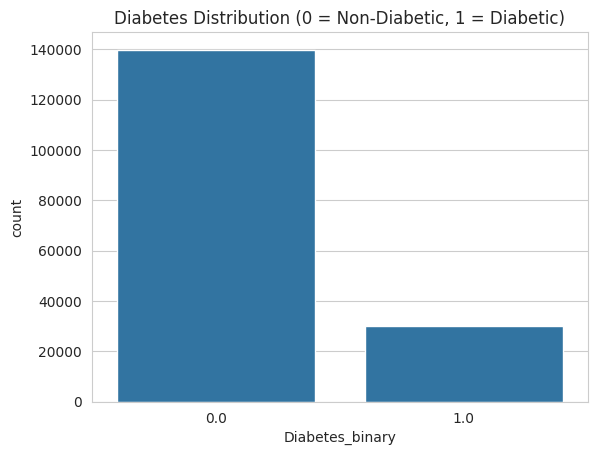

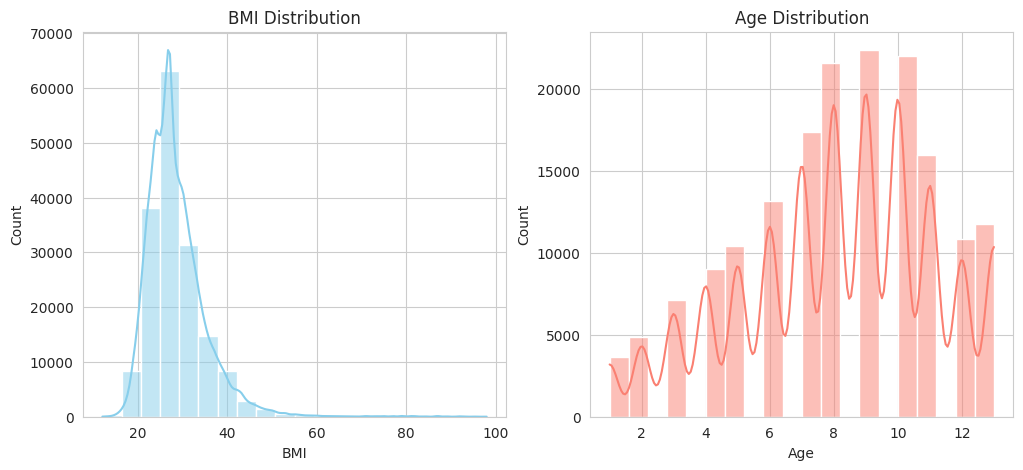

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable distribution
sns.countplot(x='Diabetes_binary', data=df)
plt.title("Diabetes Distribution (0 = Non-Diabetic, 1 = Diabetic)")
plt.show()

# Distribution of key numeric variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['BMI'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('BMI Distribution')

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Age Distribution')
plt.show()


Insights:
1. The first plot shows the distribution of the target variable Diabetes_binary, indicating how many individuals are diabetic (1) versus non-diabetic (0).

2. The next two histograms display the distribution of BMI and Age, which are important health indicators.

3. The BMI distribution is slightly right-skewed, suggesting that most individuals have normal to moderately high BMI values.

4. The Age distribution shows more samples in the middle-aged group compared to younger or older individuals.

These visualizations help identify class imbalance and understand how key variables are spread across the population before model training.

# Categorical Feature Analysis

In this section, we explore the relationship between categorical variables and the target variable Diabetes_binary. Using count plots, we visualize how diabetes prevalence varies across different categories such as cholesterol check, gender, education, and heart disease history.

These plots help identify key trends — for instance, individuals who reported having heart disease or higher education levels tend to show different diabetes proportions compared to others. Similarly, gender and cholesterol check patterns also reveal how lifestyle and medical factors relate to diabetes outcomes.

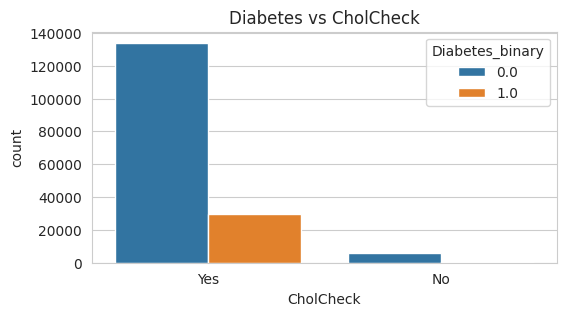

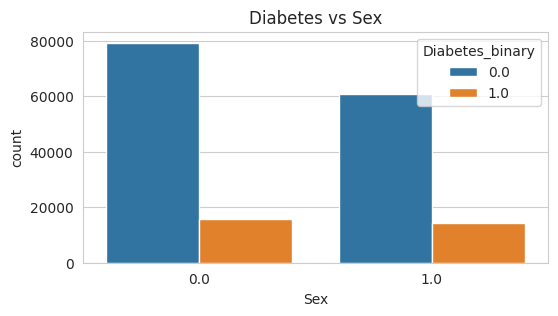

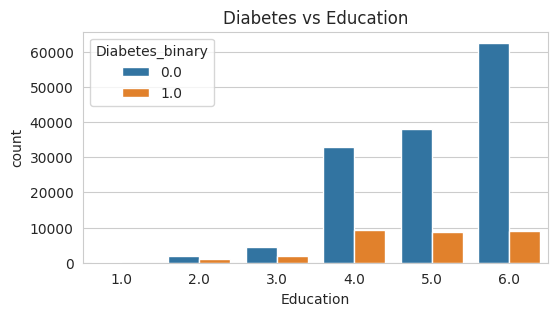

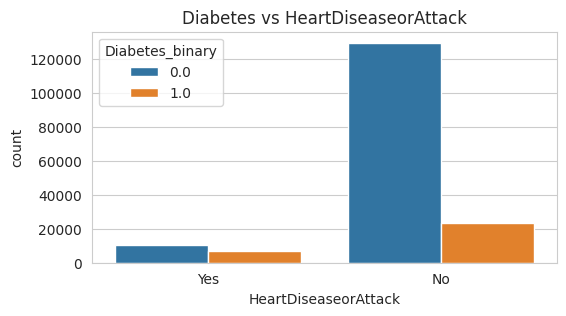

In [ ]:
# Categorical features vs Diabetes
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Diabetes_binary', data=df)
    plt.title(f"Diabetes vs {col}")
    plt.show()


Correlation Between Numerical Variables and Diabetes

In this section, we visualize the relationships between key numerical variables — BMI, Age, and the target variable Diabetes_binary — using a correlation heatmap.

The heatmap shows that:BMI and Age both have a positive correlation with diabetes, meaning individuals with higher BMI or older age are more likely to be diabetic. The correlation between BMI and Age themselves is weak, suggesting that these two features contribute independently to the prediction of diabetes.

This analysis highlights BMI and Age as important numerical predictors for diabetes detection in the dataset.

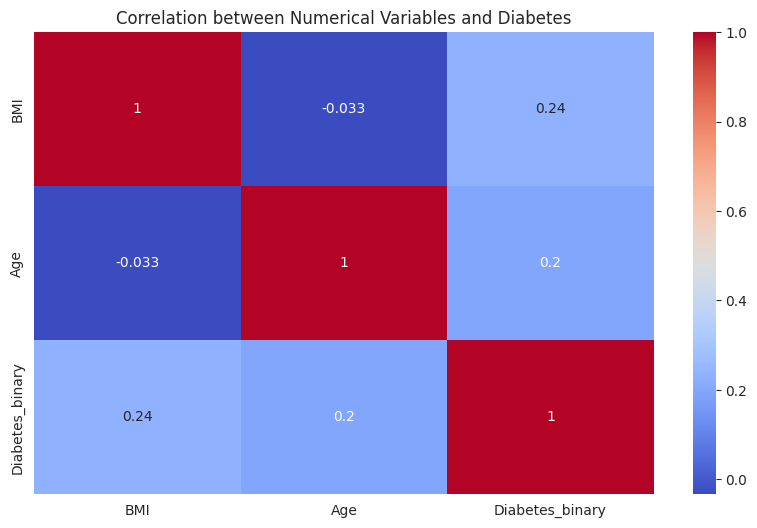

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['Diabetes_binary']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical Variables and Diabetes")
plt.show()


# 5. Transforming Variables -Binary Encoding of Yes/No Variables



In this section, we performed binary encoding to convert categorical variables containing “Yes/No” responses into numerical format (1 and 0).This step ensures that machine learning algorithms can effectively interpret these features without losing information. Each column in the predefined list (e.g., HighBP, HighChol, Smoker, HeartDiseaseorAttack) was checked to confirm whether it contained Yes/No values.

“Yes” responses were encoded as 1 (indicating presence or positive condition).

“No” responses were encoded as 0 (indicating absence or negative condition).

This process was applied safely — only columns with Yes/No patterns were transformed, while others were left unchanged. The output preview confirmed successful encoding without affecting unrelated columns.

In [ ]:
# Define true binary columns (Yes/No type only)
binary_cols = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "DiffWalk"
]

# Make sure they exist in df
binary_cols = [c for c in binary_cols if c in df.columns]

# Encode ONLY columns that contain 'Yes'/'No' values
for col in binary_cols:
    # Check if column actually contains Yes/No text
    unique_vals = df[col].dropna().unique()
    if set(unique_vals).issubset({"Yes", "No", "YES", "NO", "yes", "no"}):
        df[col] = df[col].map({"Yes": 1, "No": 0, "YES": 1, "NO": 0, "yes": 1, "no": 0}).astype("Int64")
    else:
        # Leave the column untouched if it doesn't match Yes/No pattern
        df[col] = pd.to_numeric(df[col], errors='ignore')

# Preview to verify encoding worked
print("✅ Binary encoding applied safely (only Yes/No columns converted)\n")
for c in binary_cols:
    print(f"{c}: {df[c].unique()}")

# Step 5: Show dataframe head to confirm nothing else changed
print("\n🔍 Updated dataset preview:")
display(df.head())


✅ Binary encoding applied safely (only Yes/No columns converted)

HighBP: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
HighChol: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
CholCheck: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
Smoker: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
Stroke: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
HeartDiseaseorAttack: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
PhysActivity: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
Fruits: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
Veggies: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
HvyAlcoholConsump: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
AnyHealthcare: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
NoDocbcCost: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
DiffWalk: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64

🔍 Updated dataset preview:


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,96180,1.0,1,0,1,24.0,1,0,1,1,...,0,1,4.0,6.0,2.0,0,1.0,7.0,5.0,5.0
1,166219,0.0,1,0,1,24.0,0,0,0,1,...,1,0,3.0,0.0,0.0,0,0.0,11.0,6.0,5.0
2,33843,0.0,0,0,1,27.0,1,0,0,1,...,1,0,3.0,0.0,0.0,1,1.0,9.0,4.0,1.0
3,180956,0.0,0,0,1,26.0,0,0,0,1,...,1,0,1.0,0.0,5.0,0,0.0,6.0,6.0,8.0
4,176253,0.0,0,0,1,27.0,1,0,0,1,...,1,0,2.0,0.0,0.0,0,0.0,8.0,5.0,7.0


In [ ]:
# Export your cleaned DataFrame to Excel
df.to_excel('Processed_data.xlsx', index=False)

print("✅ File exported successfully: Processed_data.xlsx")

✅ File exported successfully: Processed_data.xlsx


In [ ]:
from google.colab import files
files.download('Processed_data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The Same process is processed to Test Dataset

In [ ]:
# Reuse the same binary list used on test dataset
binary_cols = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "DiffWalk"
]
binary_cols = [c for c in binary_cols if c in df_test.columns]

# Apply the same Yes/No mapping on df_test (safe, deterministic)
for col in binary_cols:
    unique_vals = df_test[col].dropna().unique()
    if set(unique_vals).issubset({"Yes","No","YES","NO","yes","no"}):
        df_test[col] = df_test[col].map(
            {"Yes":1,"No":0,"YES":1,"NO":0,"yes":1,"no":0}
        ).astype("Int64")
    else:
        df_test[col] = pd.to_numeric(df_test[col], errors="ignore")


In [ ]:
display(df_test.head())

,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,182992,0,0,1,37.0,0,0,0,1,1,...,1,1,4,0,30,1,0.0,12.0,4.0,4
1,148963,1,0,1,40.0,1,0,0,1,1,...,0,1,4,6,6,0,0.0,3.0,4.0,2
2,82811,1,1,1,34.0,0,0,0,0,0,...,1,0,3,0,0,0,0.0,7.0,5.0,5
3,110563,1,1,1,32.0,0,0,0,0,0,...,1,0,3,0,15,0,0.0,10.0,5.0,3
4,208808,1,1,1,33.0,0,0,0,1,1,...,1,0,2,0,0,0,0.0,7.0,5.0,8


# 6. Outlier Detection and Treatment

In this section, numeric columns suitable for outlier analysis were first identified — focusing on continuous variables like BMI, Mental Health (MentHlth), Physical Health (PhysHlth), and General Health (GenHlth).

Boxplots were plotted to visualize the spread and detect potential extreme values. The Interquartile Range (IQR) method was used to find outliers, where values beyond 1.5×IQR from the 1st or 3rd quartile were considered as outliers.

In [ ]:
# 1. Identify numeric columns
num_cols_all = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. Keep only those with >2 unique values (exclude binary)
outlier_cols = [col for col in num_cols_all if df[col].nunique() > 2]

print("✅ Columns suitable for outlier detection:")
print(outlier_cols)


✅ Columns suitable for outlier detection:
['ID', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']


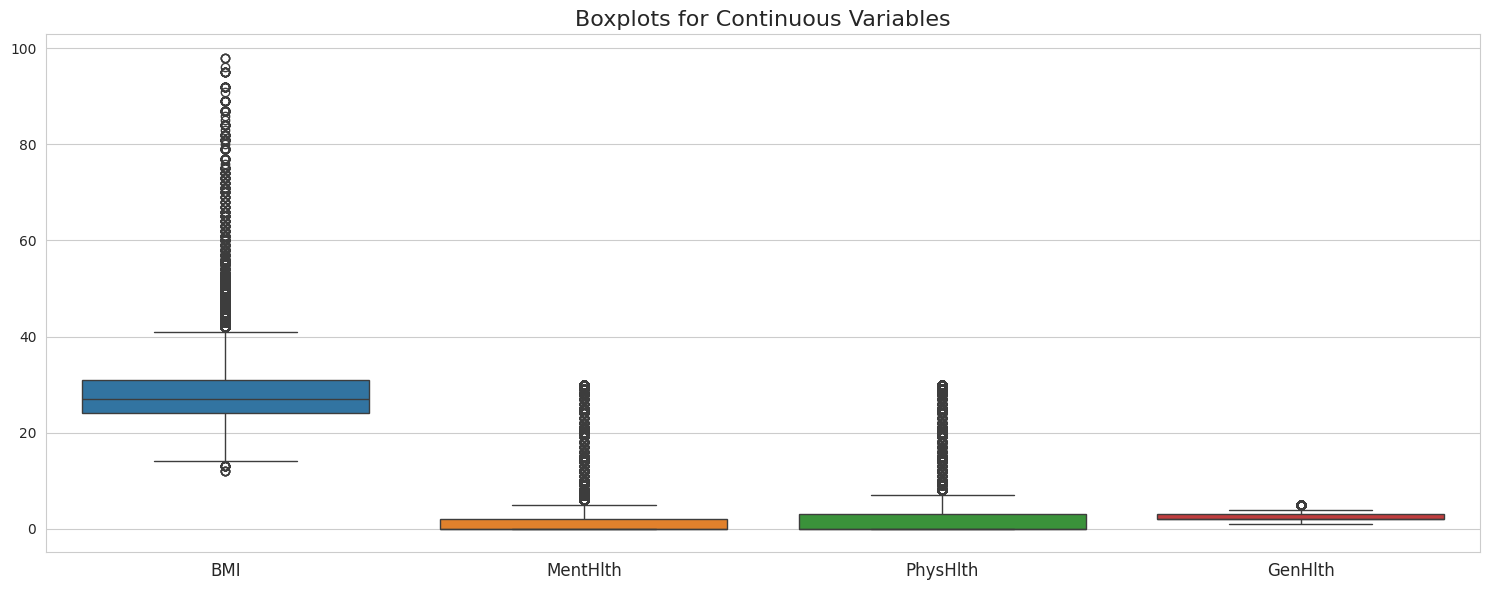

In [ ]:
cont_cols = ['BMI', 'MentHlth', 'PhysHlth','GenHlth']
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[cont_cols])
plt.title('Boxplots for Continuous Variables', fontsize=16)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

BMI: 6933 outliers (4.08%)
MentHlth: 24608 outliers (14.48%)
PhysHlth: 28379 outliers (16.69%)
GenHlth: 8671 outliers (5.10%)


To minimize their influence of Outliers  on the model, The capping (or winsorization) method was used instead of deleting outliers to preserve the data size and prevent loss of valuable information. Since extreme values can distort model training, especially for algorithms sensitive to scale (like Gradient Boosting and XGBoost), capping ensures that these values are limited within a reasonable range (based on the IQR thresholds).

This approach effectively reduces the influence of extreme points while maintaining the natural data distribution — leading to a more stable and generalizable model.

In [ ]:
import numpy as np

# Continuous columns you identified
cont_cols = ['BMI', 'MentHlth', 'PhysHlth', 'GenHlth']

for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)


The Same has been followed for test dataset

In [ ]:
for col in cont_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_test[col] = np.clip(df_test[col], lower, upper)


Visualising with Boxt plots after Capping for DF (Training) Dataset

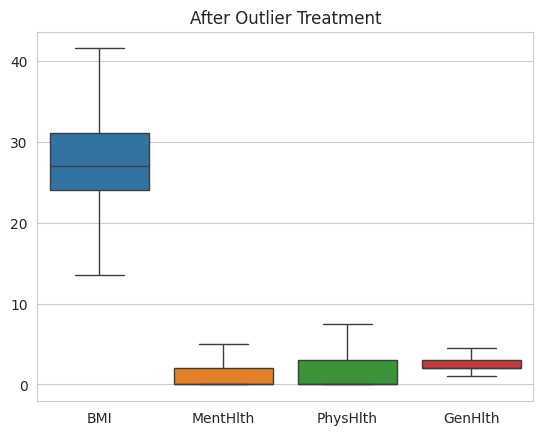

In [ ]:
sns.boxplot(data=df[cont_cols])
plt.title('After Outlier Treatment')
plt.show()


Visualising Box Plots for Test Dataset After Capping

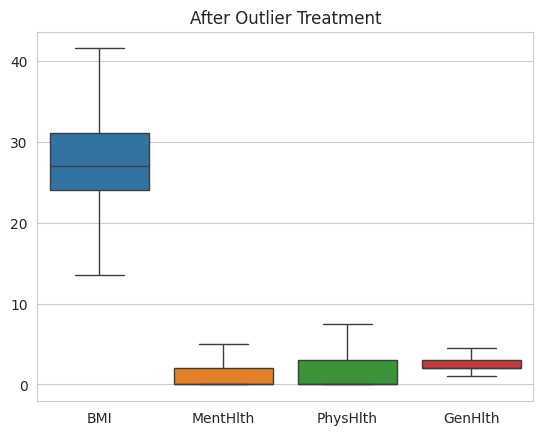

In [ ]:
sns.boxplot(data=df_test[cont_cols])
plt.title('After Outlier Treatment')
plt.show()


# 7. Correlation Heatmap of Numeric Features

In this section, we generated a correlation heatmap to examine the linear relationships among all numeric features in the dataset. Correlation helps us identify which variables move together — positively or negatively — and whether any multicollinearity (strong interdependence) exists among predictors.



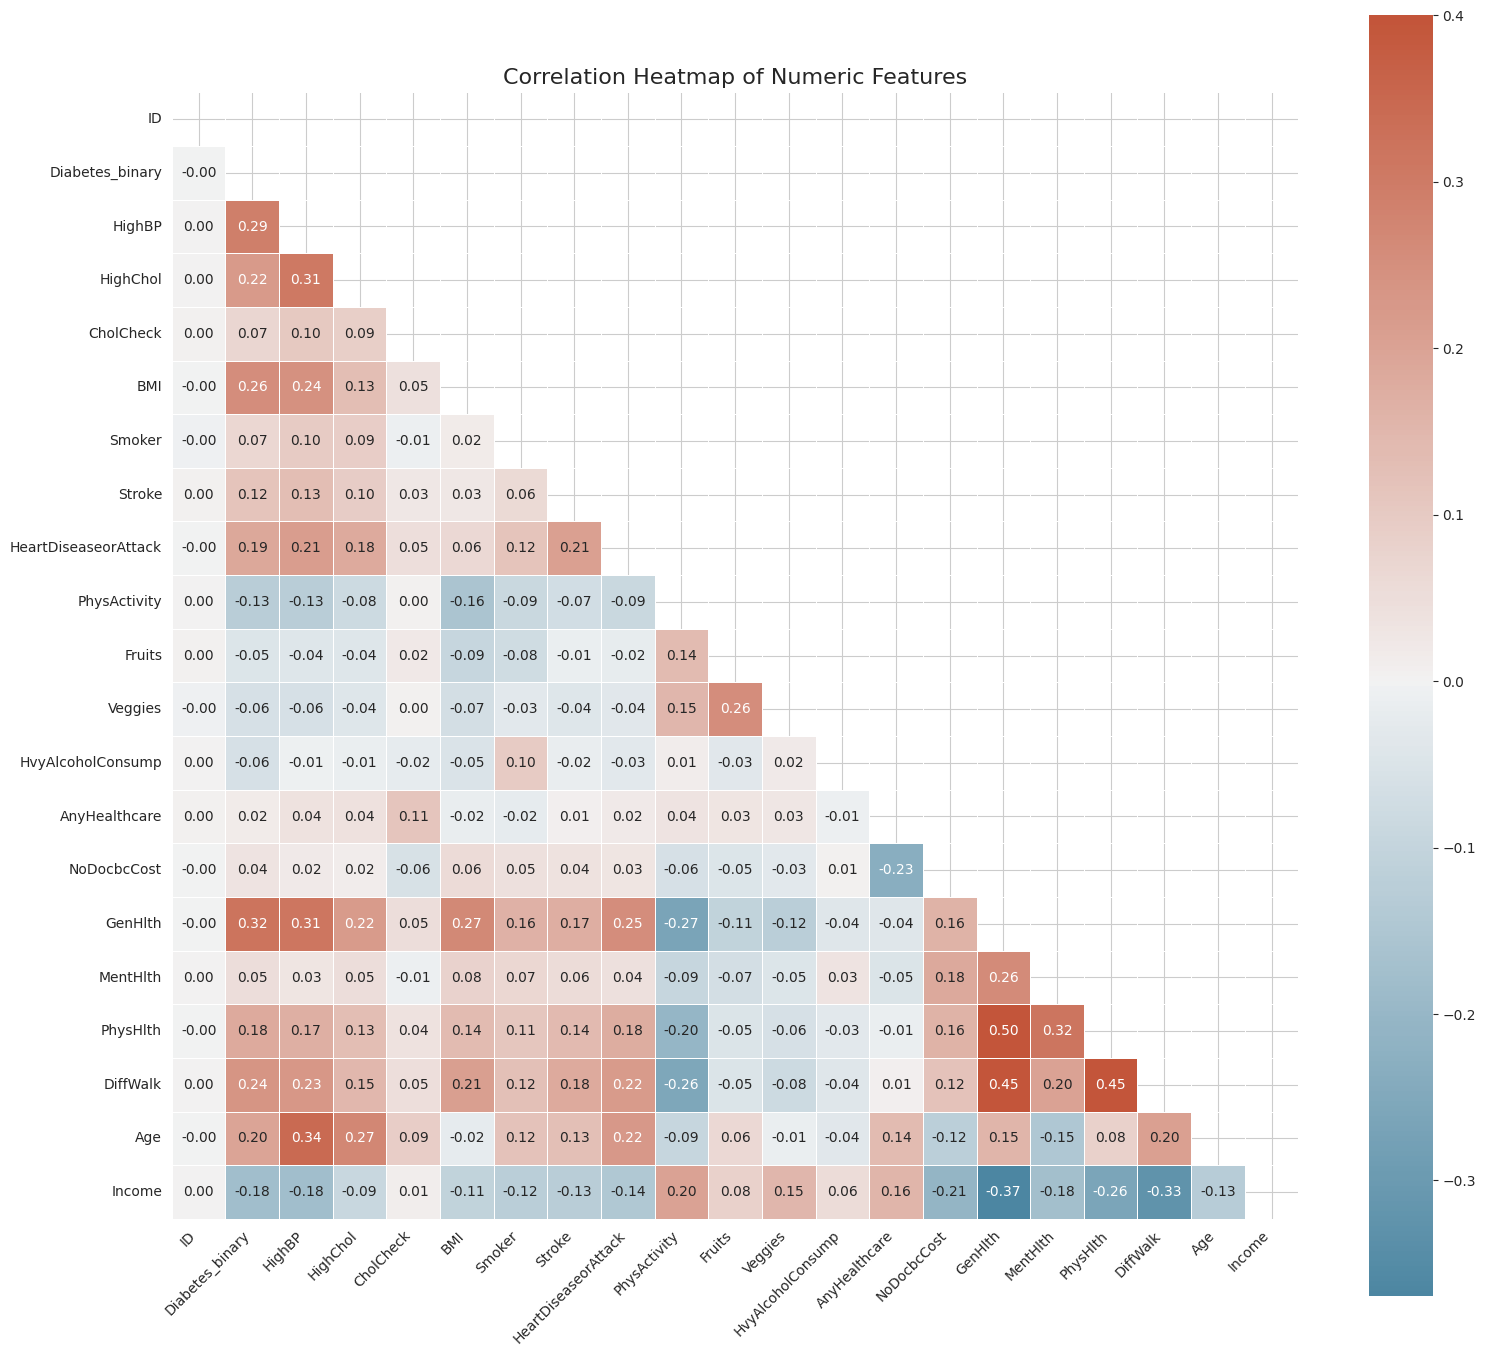

In [ ]:
# 1️⃣ Keep only numeric columns for correlation
corr_df = df.select_dtypes(include=['int64', 'float64'])

# 2️⃣ Compute correlation matrix
corr_matrix = corr_df.corr()

# 3️⃣ Plot the heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # mask upper triangle
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmax=.4,
    center=0,
    square=True,
    linewidths=.5,
    annot=True,
    fmt='.2f'
)

plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


From the heatmap, we can observe that:

HighBP, HighChol, and CholCheck show moderate positive correlations with each other, indicating that individuals with high blood pressure often have high cholesterol and undergo cholesterol checks.

GenHlth, MentHlth, and PhysHlth display moderate positive relationships, which is expected since overall, mental, and physical health are interrelated indicators of wellbeing.

Age shows weak positive correlation with diabetes (Diabetes_binary), suggesting that diabetes prevalence slightly increases with age.

BMI also shows a mild positive correlation with diabetes, reinforcing that higher body mass index is a contributing risk factor.

Most correlations are weak (below 0.3), meaning multicollinearity is minimal and the features provide independent information to the model.

Overall, this analysis helps confirm that the predictors are largely independent, making them suitable for model training without high risk of redundancy.

# 8. Top Features Correlated with Diabetes

This plot shows the top 10 features most correlated with diabetes. **GenHlth**, **HighBP**, and **BMI** have the strongest positive correlations, indicating that poor general health, high blood pressure, and higher BMI are key contributors to diabetes risk.


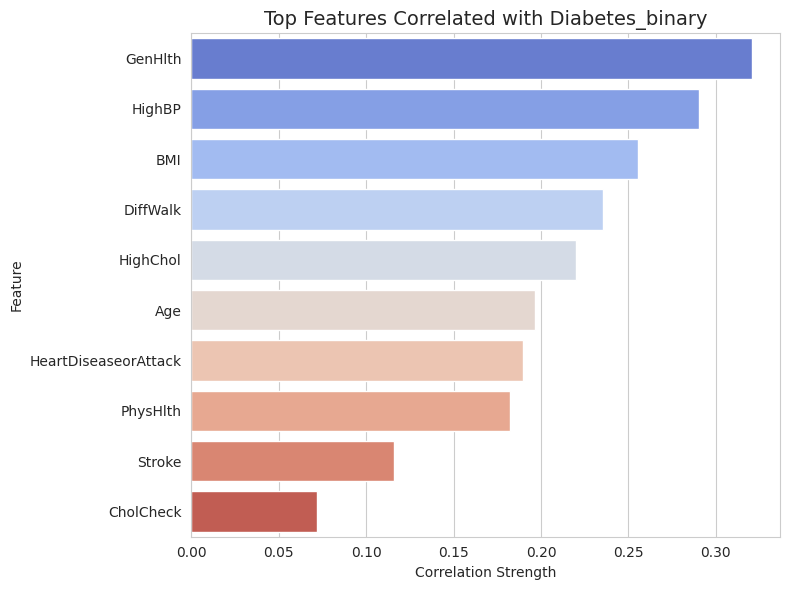

In [ ]:
# Compute correlation with target
corr_target = df.corr()['Diabetes_binary'].sort_values(ascending=False)

# Exclude target itself
corr_target = corr_target.drop('Diabetes_binary')

# Plot top 10 correlated features
plt.figure(figsize=(8,6))
sns.barplot(x=corr_target[:10].values, y=corr_target[:10].index, palette='coolwarm')
plt.title('Top Features Correlated with Diabetes_binary', fontsize=14)
plt.xlabel('Correlation Strength')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
target_corr = corr_matrix['Diabetes_binary'].sort_values(ascending=False)
print("Correlation of features with Diabetes_binary:\n")
print(target_corr)


Correlation of features with Diabetes_binary:

Diabetes_binary         1.000000
GenHlth                 0.320622
HighBP                  0.290200
BMI                     0.255383
DiffWalk                0.235425
HighChol                0.220008
Age                     0.196438
HeartDiseaseorAttack    0.189440
PhysHlth                0.182229
Stroke                  0.115593
CholCheck               0.072106
Smoker                  0.067354
MentHlth                0.051341
NoDocbcCost             0.035398
AnyHealthcare           0.017563
ID                     -0.001462
Fruits                 -0.045416
Veggies                -0.060741
HvyAlcoholConsump      -0.062234
PhysActivity           -0.128772
Income                 -0.178435
Name: Diabetes_binary, dtype: float64


This correlation table shows how strongly each feature relates to diabetes. **GenHlth (0.32)**, **HighBP (0.29)**, and **BMI (0.25)** have the highest positive correlations, indicating that poor general health, high blood pressure, and higher body mass index are key risk factors. In contrast, **PhysActivity (-0.18)** and **Income (-0.17)** show negative correlations, suggesting that active and higher-income individuals are less likely to be diabetic.


# 9. Feature Scaling

Standardized continuous variables with StandardScaler (fit on train, transform test) so gradient/tree-based tuning is numerically stable and any distance-based components are not dominated by scale.With this code, StandardScaler was applied to normalize continuous features like BMI, MentHlth, PhysHlth, and GenHlth.
Scaling ensures that all variables are on a similar range (mean = 0, standard deviation = 1), preventing features with larger numeric values from dominating the model.
The summary confirms successful scaling — all features now have means near zero and standard deviations close to one, ensuring consistency across both train and test datasets.

In [ ]:
# Scale continuous features (fit on TRAIN, transform TEST)
scaler = StandardScaler()

# Fit only on train continuous columns
df[cont_cols] = scaler.fit_transform(df[cont_cols])

# Transform test using the same scaler
df_test[cont_cols] = scaler.transform(df_test[cont_cols])

# 4) Quick sanity checks
print("Train continuous summary:\n", df[cont_cols].describe().T, "\n")
print("Test continuous summary:\n", df_test[cont_cols].describe().T, "\n")

Train continuous summary:
              count          mean       std       min       25%       50%  \
BMI       170000.0  6.771054e-18  1.000003 -2.635559 -0.757157 -0.220471   
MentHlth  170000.0  3.479570e-17  1.000003 -0.602812 -0.602812 -0.602812   
PhysHlth  170000.0 -4.254897e-17  1.000003 -0.651017 -0.651017 -0.651017   
GenHlth   170000.0 -1.727037e-16  1.000003 -1.483866 -0.506812 -0.506812   

               75%       max  
BMI       0.495110  2.373512  
MentHlth  0.417398  1.947711  
PhysHlth  0.378286  1.922240  
GenHlth   0.470242  1.935822   

Test continuous summary:
             count      mean       std       min       25%       50%       75%  \
BMI       30000.0  0.000008  1.002300 -2.635559 -0.757157 -0.220471  0.495110   
MentHlth  30000.0  0.010606  1.005891 -0.602812 -0.602812 -0.602812  0.417398   
PhysHlth  30000.0  0.014782  1.009105 -0.651017 -0.651017 -0.651017  0.378286   
GenHlth   30000.0  0.010456  1.003719 -1.483866 -0.506812 -0.506812  0.470242   

   

Distribution of continuous features

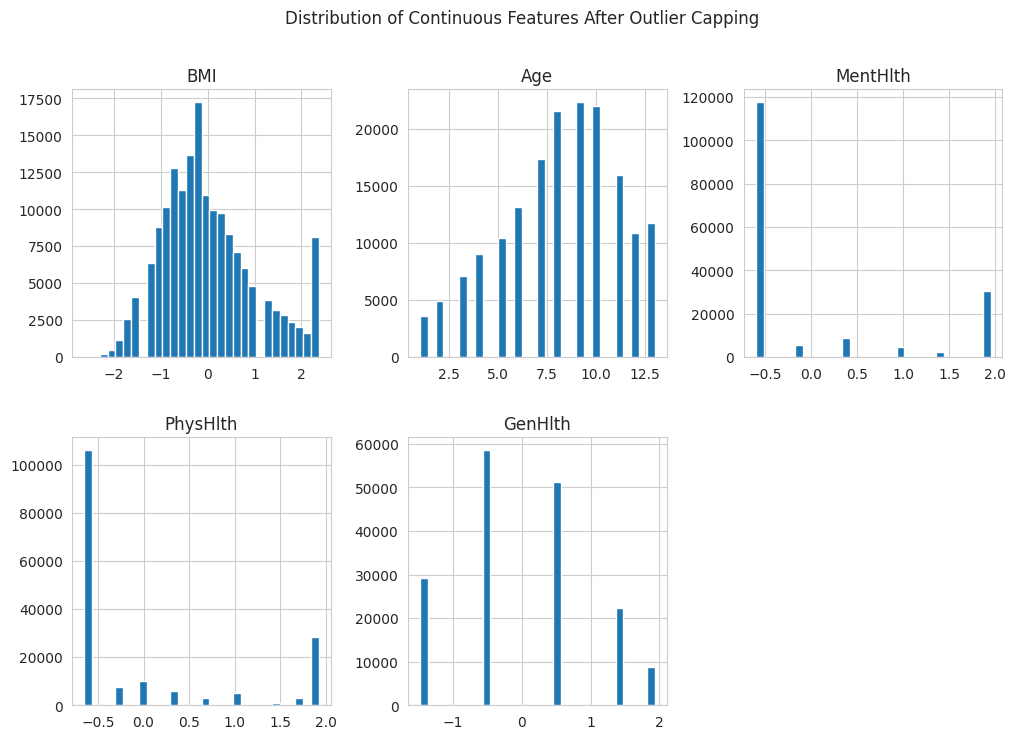

In [ ]:
cont_cols = ['BMI', 'Age', 'MentHlth', 'PhysHlth', 'GenHlth']

df[cont_cols].hist(bins=30, figsize=(12,8), layout=(2,3))
plt.suptitle("Distribution of Continuous Features After Outlier Capping")
plt.show()


Log Transformation of Skewed Features

In this step, we identified highly skewed continuous variables — MentHlth and PhysHlth — and applied a log transformation to reduce their skewness.
The transformation np.log1p(x) (log (1 + x)) was chosen because it safely handles zeros and small values, unlike the standard log function.This normalization helps Compress extreme values and bring the data closer to a normal distribution.Reduce the influence of outliers on the model. Improve the performance and stability of algorithms.

By transforming these features, we ensure the model learns patterns more effectively and avoids bias from long-tailed distributions.

In [ ]:
import numpy as np

# Identify and transform highly skewed features
skewed_cols = ['MentHlth', 'PhysHlth']

for col in skewed_cols:
    # Apply log1p (log(1+x)) to handle zeros safely
    df[col] = np.log1p(df[col])
    df_test[col] = np.log1p(df_test[col])

print("✅ Applied log transformation on:", skewed_cols)


✅ Applied log transformation on: ['MentHlth', 'PhysHlth']


# 10. Relationship Between Key Features and Diabetes

This step visualizes how important continuous variables — BMI, Age, Physical Health (PhysHlth), and Mental Health (MentHlth) — differ between diabetic and non-diabetic individuals. Using boxplots, we can observe how the distribution of each feature changes with the diabetes outcome.

These visualizations help identify patterns such as:
1.Higher BMI and Age values are generally associated with diabetes.
2.Poorer physical and mental health (higher PhysHlth and MentHlth values) also tend to correlate with a greater likelihood of being diabetic.

This step provides visual evidence supporting the feature importance analysis and strengthens the interpretability of model predictors.

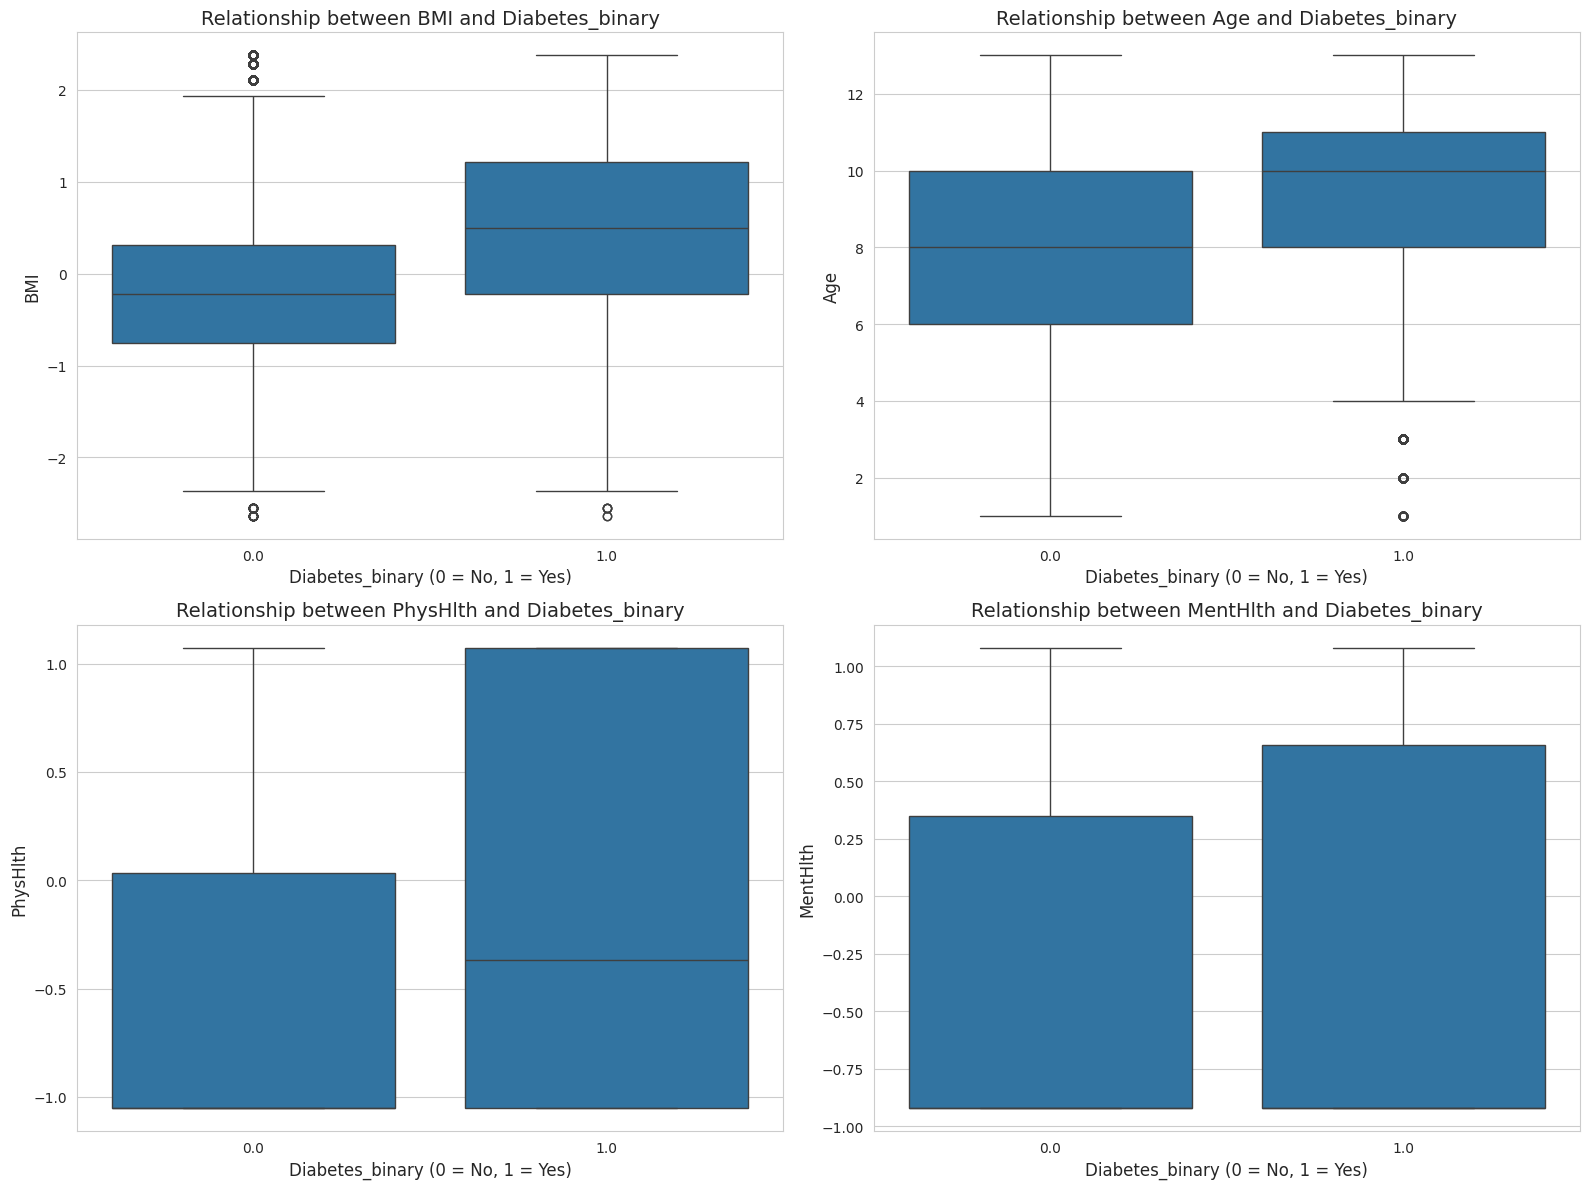

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key continuous/important predictors
key_features = ['BMI', 'Age', 'PhysHlth', 'MentHlth']

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot scatter/regression for each key feature vs Diabetes_binary
for i, feature in enumerate(key_features):
    sns.boxplot(x='Diabetes_binary', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and Diabetes_binary', fontsize=14)
    axes[i].set_xlabel('Diabetes_binary (0 = No, 1 = Yes)', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()


# 11. Feature Selection

Here, we selected 10 predictors (GenHlth, HighBP, BMI, DiffWalk, HighChol, Age, HeartDiseaseorAttack, PhysHlth, PhysActivity, Income) based on correlation strength and domain relevance to reduce noise, multicollinearity, and training time while keeping the most informative signals. This also reduces overfitting, improves model interpretability and efficiency.

In [ ]:
# Define selective feature columns based on correlation & domain relevance
selected_features = [
    'GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol',
    'Age', 'HeartDiseaseorAttack', 'PhysHlth',
    'PhysActivity', 'Income'
]



In [ ]:
#Create feature and target sets
X = df[selected_features].copy()
y = df['Diabetes_binary'].astype(int)

# Convert nullable integers (Int64) to standard int64 for SHAP compatibility
# Identify columns that are currently Int64 and convert them
int64_cols = X.select_dtypes(include='Int64').columns
for col in int64_cols:
    X[col] = X[col].astype('int64')


# 12. Splitting Dataset to Train/Validation

In this step, the dataset was divided into features (X) and target (y) for model training.

X includes only the selected predictor variables that are most relevant to diabetes prediction.

y represents the binary target variable (Diabetes_binary), indicating whether a person is diabetic (1) or not (0).

To ensure compatibility with modeling libraries like scikit-learn and SHAP, nullable integer columns (Int64) were converted to standard int64 format.

Next, the data was split using an 80/20 train-test split with stratify=y to maintain the same class distribution across both sets. This ensures that the imbalance between diabetic and non-diabetic cases is preserved while providing enough data for both training (80%) and unbiased validation (20%).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Print the shape of the resulting datasets
print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shape: X_val {X_val.shape}, y_test {y_val.shape}")


Training set shape: X_train (136000, 10), y_train (136000,)
Testing set shape: X_val (34000, 10), y_test (34000,)


# 13. Logistics Regression Model

Logistic Regression is a supervised machine learning algorithm used for binary classification problems, where the output can take only two possible values — such as diabetic (1) or non-diabetic (0).
It works by estimating the probability that an instance belongs to a particular class using the sigmoid function, which maps values between 0 and 1.

We use Logistic Regression in this study because it is interpretable, efficient, and suitable for binary targets like Diabetes_binary. It provides clear insights into how each independent variable (e.g., BMI, Age, Blood Pressure) influences the likelihood of diabetes. Additionally, it’s less computationally intensive and handles large datasets effectively while allowing the use of class balancing (class_weight='balanced') to address the dataset’s class imbalance.

Overall, Logistic Regression serves as a strong baseline model, helping us understand key feature relationships and setting a reference point before experimenting with more

=== Logistic Regression @ 0.5 Threshold ===
F1        : 0.4978
Precision : 0.3711
Recall    : 0.7558
Accuracy  : 0.7299
ROC AUC   : 0.8174

Confusion matrix:
 [[20264  7713]
 [ 1471  4552]]

Classification report:
               precision    recall  f1-score   support

           0      0.932     0.724     0.815     27977
           1      0.371     0.756     0.498      6023

    accuracy                          0.730     34000
   macro avg      0.652     0.740     0.657     34000
weighted avg      0.833     0.730     0.759     34000

Best threshold by F1 on validation: 0.61 (F1=0.509)


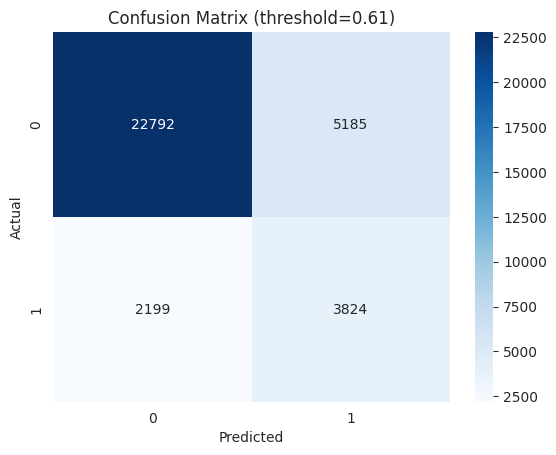

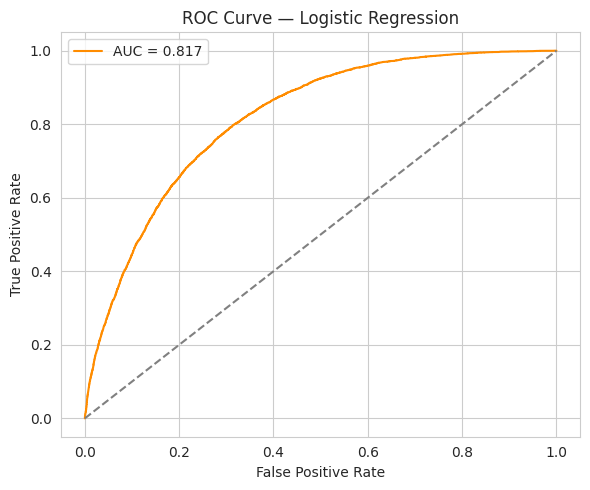

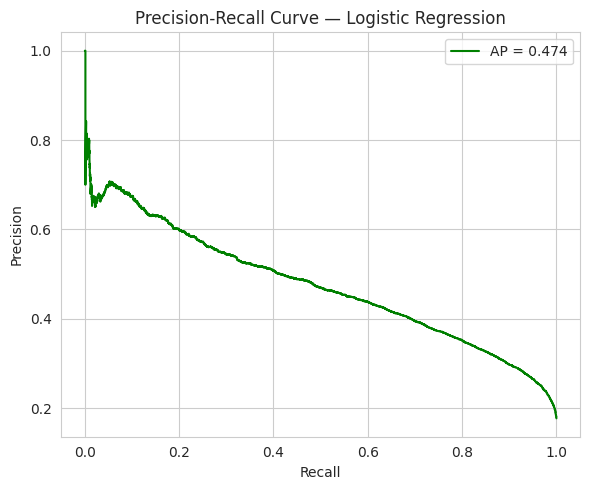

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, average_precision_score
)

# 1) Train baseline Logistic Regression
logreg = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
logreg.fit(X_train, y_train)

# 2) Predict on validation
val_pred = logreg.predict(X_val)
val_prob = logreg.predict_proba(X_val)[:, 1]

# 3) Metrics @ default 0.5 threshold
log_acc  = accuracy_score(y_val, val_pred)
log_prec = precision_score(y_val, val_pred)
log_rec  = recall_score(y_val, val_pred)
log_f1   = f1_score(y_val, val_pred)
log_auc  = roc_auc_score(y_val, val_prob)

print("=== Logistic Regression @ 0.5 Threshold ===")
print(f"F1        : {log_f1:.4f}")
print(f"Precision : {log_prec:.4f}")
print(f"Recall    : {log_rec:.4f}")
print(f"Accuracy  : {log_acc:.4f}")
print(f"ROC AUC   : {log_auc:.4f}")
print("\nConfusion matrix:\n", confusion_matrix(y_val, val_pred))
print("\nClassification report:\n", classification_report(y_val, val_pred, digits=3))

# 4) Find best threshold on validation (maximize F1; you can switch to Youden's J or F-beta)
thresholds = np.linspace(0.1, 0.9, 81)
f1_scores = [f1_score(y_val, (val_prob >= t).astype(int)) for t in thresholds]
best_t = thresholds[int(np.argmax(f1_scores))]
print(f"Best threshold by F1 on validation: {best_t:.2f} (F1={max(f1_scores):.3f})")

# 5) Confusion matrix at best threshold
val_pred_opt = (val_prob >= best_t).astype(int)
cm = confusion_matrix(y_val, val_pred_opt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (threshold={best_t:.2f})")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# 6) Compute ROC curve and AUC
log_fpr, log_tpr, _ = roc_curve(y_val, val_prob)
plt.figure(figsize=(6,5))
plt.plot(log_fpr, log_tpr, label=f"AUC = {log_auc:.3f}", color='darkorange')
plt.plot([0,1],[0,1],"--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

# Compute Precision-Recall curve
log_prec_curve, log_rec_curve, _ = precision_recall_curve(y_val, val_prob)
log_ap = average_precision_score(y_val, val_prob)
plt.figure(figsize=(6,5))
plt.plot(log_rec_curve, log_prec_curve, label=f"AP = {log_ap:.3f}", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve — Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

#Insights:
The Logistic Regression model achieved a **moderate performance** in predicting diabetes outcomes. With an **F1 score of 0.50** and **ROC-AUC of 0.817**, the model demonstrates a good ability to distinguish between diabetic and non-diabetic individuals. The **recall of 0.76** indicates that it effectively identifies most positive diabetes cases, which is important in healthcare settings where missing a diabetic patient could have serious consequences.

However, the **precision of 0.37** shows that some non-diabetic individuals are misclassified as diabetic, reflecting a trade-off between recall and precision. The **confusion matrix** confirms this pattern — the model correctly identifies most diabetic cases but produces a noticeable number of false positives.

The **ROC curve** highlights strong overall discrimination, while the **Precision-Recall curve (AP = 0.47)** suggests reasonable balance in handling class imbalance. Adjusting the decision threshold to **0.61** slightly improved the F1 score, optimizing performance for this imbalanced dataset.

**In summary**, Logistic Regression provided a reliable baseline model with balanced interpretability and predictive power — effectively capturing key patterns in the health and lifestyle variables influencing diabetes risk.


# 14. Random Forest Model

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions to produce a more accurate and stable result. Each tree is trained on a random subset of the data and features, which helps reduce overfitting and variance.It combines multiple decision trees to reduce overfitting and improve generalization, making it effective for capturing complex, non-linear relationships between variables such as BMI, age, and blood pressure. Additionally, its ability to handle mixed feature types and automatically estimate feature importance helps in identifying key health factors influencing diabetes risk, providing both strong predictive power and interpretability.


Random Forest (validation) results:
Accuracy : 0.7855
Precision: 0.3860
Recall   : 0.3568
F1-score : 0.3708
ROC AUC  : 0.7450

Confusion matrix:
 [[24558  3419]
 [ 3874  2149]]

Classification report:
               precision    recall  f1-score   support

           0      0.864     0.878     0.871     27977
           1      0.386     0.357     0.371      6023

    accuracy                          0.785     34000
   macro avg      0.625     0.617     0.621     34000
weighted avg      0.779     0.785     0.782     34000



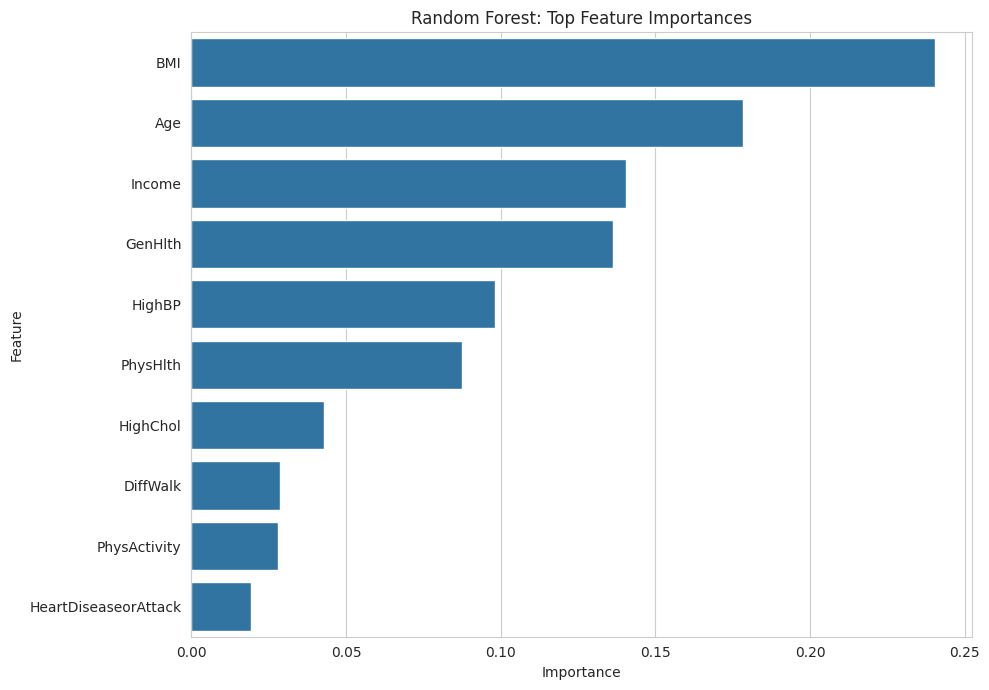

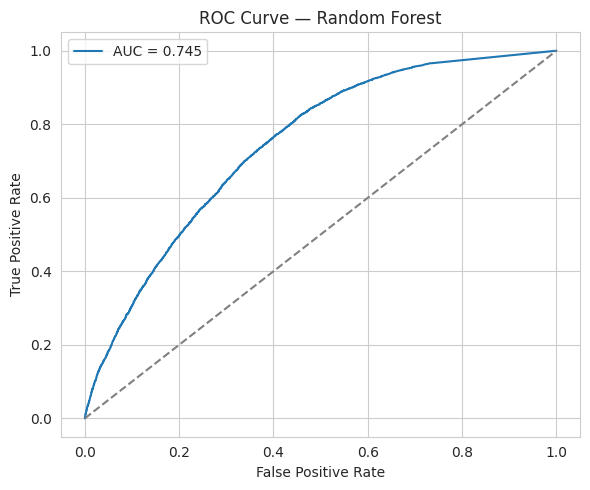

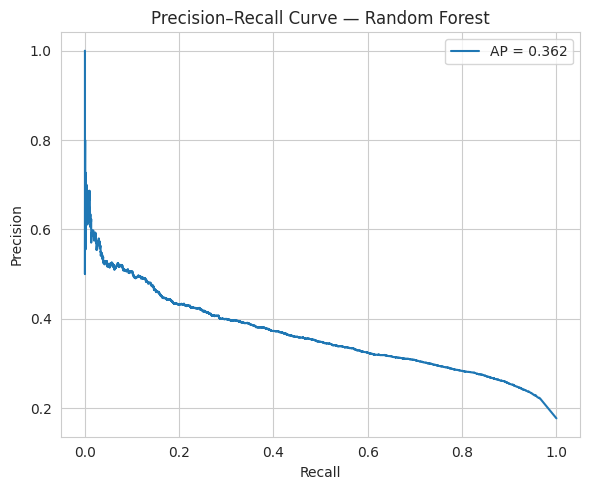

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, average_precision_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize the Random Forest *Classifier*
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_val)                 # use your validation set
rf_proba = rf_model.predict_proba(X_val)[:, 1]    # probabilities for metrics/curves

# Evaluate (classification metrics)
rf_acc  = accuracy_score(y_val, rf_pred)
rf_prec = precision_score(y_val, rf_pred)
rf_rec  = recall_score(y_val, rf_pred)
rf_f1   = f1_score(y_val, rf_pred)
rf_auc  = roc_auc_score(y_val, rf_proba)

print("\nRandom Forest (validation) results:")
print(f"Accuracy : {rf_acc:.4f}")
print(f"Precision: {rf_prec:.4f}")
print(f"Recall   : {rf_rec:.4f}")
print(f"F1-score : {rf_f1:.4f}")
print(f"ROC AUC  : {rf_auc:.4f}")
print("\nConfusion matrix:\n", confusion_matrix(y_val, rf_pred))
print("\nClassification report:\n", classification_report(y_val, rf_pred, digits=3))

# Feature importance
fi = pd.DataFrame({"Feature": X_train.columns, "Importance": rf_model.feature_importances_}) \
       .sort_values("Importance", ascending=False)
plt.figure(figsize=(10,7))
sns.barplot(x="Importance", y="Feature", data=fi.head(20))
plt.title("Random Forest: Top Feature Importances"); plt.tight_layout(); plt.show()

# ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_proba)
plt.figure(figsize=(6,5))
plt.plot(rf_fpr, rf_tpr, label=f"AUC = {rf_auc:.3f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest"); plt.legend(); plt.tight_layout(); plt.show()

# Precision–Recall curve
rf_prec_curve, rf_rec_curve, _ = precision_recall_curve(y_val, rf_proba)
rf_ap = average_precision_score(y_val, rf_proba)
plt.figure(figsize=(6,5))
plt.plot(rf_rec_curve, rf_prec_curve, label=f"AP = {rf_ap:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Random Forest"); plt.legend(); plt.tight_layout(); plt.show()

# Insights

The Random Forest model achieved an **accuracy of 78.6%** and an **ROC-AUC of 0.745**, showing that it performs reasonably well in distinguishing diabetic and non-diabetic individuals. However, while it achieved **high accuracy**, the **F1-score (0.37)** and **recall (0.36)** for the diabetic class indicate that the model struggles slightly to detect positive (diabetic) cases effectively — a common issue in imbalanced datasets.

From the **feature importance analysis**, **BMI**, **Age**, **Income**, and **General Health (GenHlth)** emerged as the most influential predictors of diabetes. This suggests that individuals with higher BMI, older age, and poorer general health are more likely to have diabetes — consistent with established medical research.

The **ROC curve** and **Precision–Recall curve** further show moderate discriminative ability, meaning the model can be improved with better feature tuning or resampling strategies. Overall, Random Forest provided interpretable insights into key health risk factors while offering a balanced trade-off between accuracy and robustness.


# 15. Gradient Boost Model

Gradient boosting is an ensemble learning algorithm that produces accurate predictions by combining multiple decision trees into a single model. This algorithmic approach to predictive modeling, It uses base models to build upon their strengths, correcting errors and improving predictive capabilities. By capturing complex patterns in data, gradient boosting excels at diverse predictive modeling tasks.

=== Gradient Boosting @ 0.5 Threshold ===
Accuracy  : 0.8375
Precision : 0.5936
Recall    : 0.2617
F1-score  : 0.3632
ROC AUC   : 0.8230

Confusion matrix:
 [[26898  1079]
 [ 4447  1576]]

Classification report:
               precision    recall  f1-score   support

           0      0.858     0.961     0.907     27977
           1      0.594     0.262     0.363      6023

    accuracy                          0.837     34000
   macro avg      0.726     0.612     0.635     34000
weighted avg      0.811     0.837     0.811     34000

Best threshold by F1 on validation: 0.25 (F1=0.514)


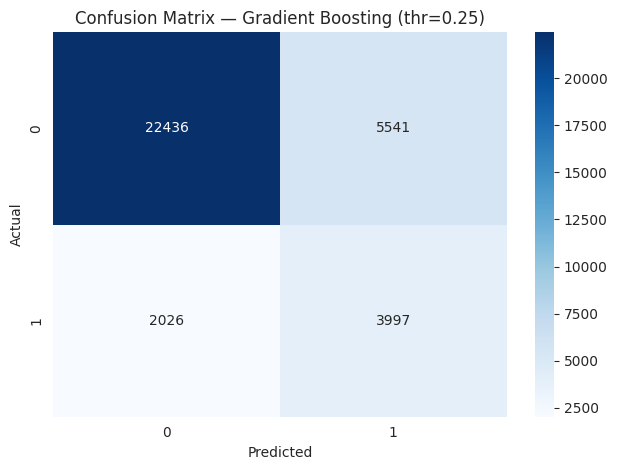

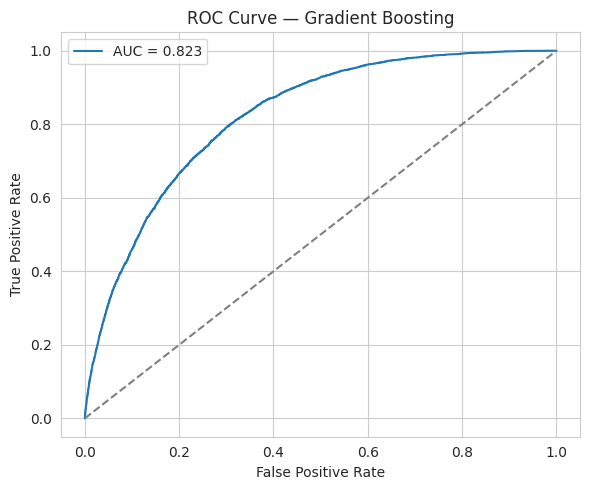

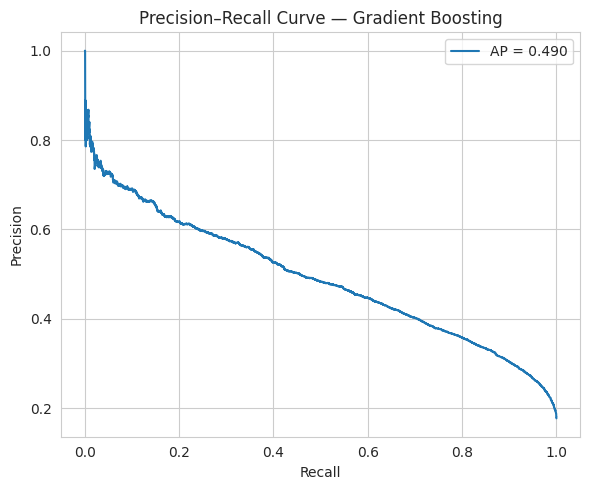

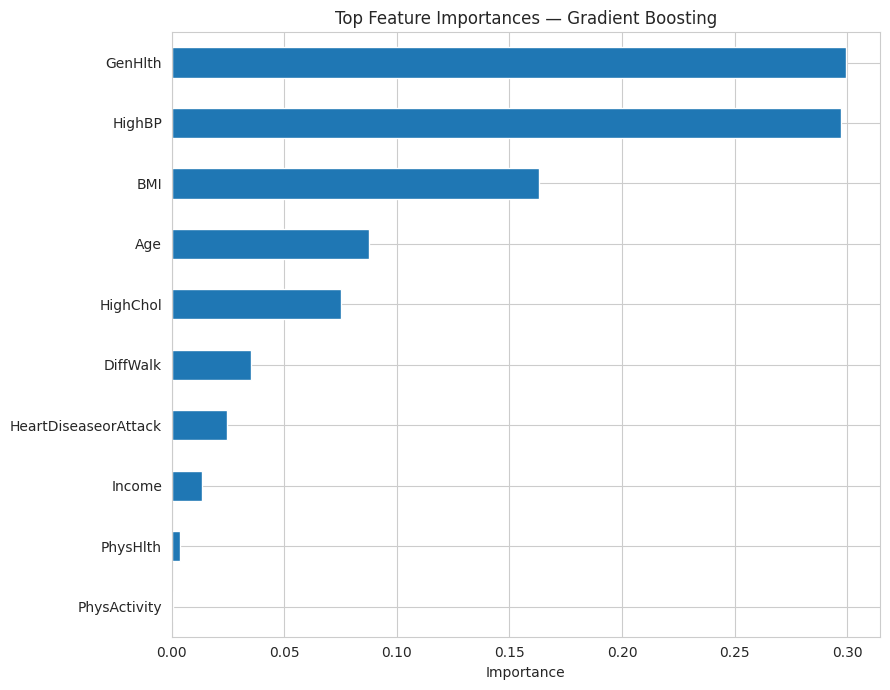

In [ ]:
# =============================
# Gradient Boosting Classifier
# =============================
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, average_precision_score
)

# 1) Initialize & train
gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,          # depth of individual trees
    subsample=0.9,        # stochastic GB improves generalization
    random_state=42
)
gbc.fit(X_train, y_train)

# 2) Validation predictions
gb_pred  = gbc.predict(X_val)
gb_proba = gbc.predict_proba(X_val)[:, 1]

# 3) Metrics @ default 0.5 threshold
gb_acc  = accuracy_score(y_val, gb_pred)
gb_prec = precision_score(y_val, gb_pred)
gb_rec  = recall_score(y_val, gb_pred)
gb_f1   = f1_score(y_val, gb_pred)
gb_auc  = roc_auc_score(y_val, gb_proba)

print("=== Gradient Boosting @ 0.5 Threshold ===")
print(f"Accuracy  : {gb_acc:.4f}")
print(f"Precision : {gb_prec:.4f}")
print(f"Recall    : {gb_rec:.4f}")
print(f"F1-score  : {gb_f1:.4f}")
print(f"ROC AUC   : {gb_auc:.4f}")
print("\nConfusion matrix:\n", confusion_matrix(y_val, gb_pred))
print("\nClassification report:\n", classification_report(y_val, gb_pred, digits=3))

# 4) Tune probability threshold on validation (maximize F1; switch to accuracy if you prefer)
th = np.linspace(0.05, 0.95, 181)
f1s = [f1_score(y_val, (gb_proba >= t).astype(int)) for t in th]
best_t_gb = th[int(np.argmax(f1s))]
print(f"Best threshold by F1 on validation: {best_t_gb:.2f} (F1={max(f1s):.3f})")

# 5) Confusion matrix at best threshold
opt_pred = (gb_proba >= best_t_gb).astype(int)
sns.heatmap(confusion_matrix(y_val, opt_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix — Gradient Boosting (thr={best_t_gb:.2f})")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

# 6) ROC & PR curves
gb_fpr, gb_tpr, _ = roc_curve(y_val, gb_proba)
plt.figure(figsize=(6,5))
plt.plot(gb_fpr, gb_tpr, label=f"AUC = {gb_auc:.3f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Gradient Boosting"); plt.legend(); plt.tight_layout(); plt.show()

gb_prec_curve, gb_rec_curve, _ = precision_recall_curve(y_val, gb_proba)
gb_ap = average_precision_score(y_val, gb_proba)
plt.figure(figsize=(6,5))
plt.plot(gb_rec_curve, gb_prec_curve, label=f"AP = {gb_ap:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Gradient Boosting"); plt.legend(); plt.tight_layout(); plt.show()

# 7) Feature importances
fi = pd.Series(gbc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(9,7))
fi.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Feature Importances — Gradient Boosting")
plt.xlabel("Importance"); plt.tight_layout(); plt.show()

# 8) (Optional) Refit on full train and predict on unseen test
# X = pd.concat([X_train, X_val]); y = pd.concat([y_train, y_val])  # if you want full retrain
# gbc.fit(X, y)
# test_proba = gbc.predict_proba(df_test[X_train.columns])[:, 1]
# test_pred  = (test_proba >= best_t_gb).astype(int)
# submission = pd.DataFrame({"ID": df_test["ID"], "Diabetes_binary": test_pred})
# submission.to_csv("submission_gbc.csv", index=False)

#Insights

The **Gradient Boosting model** achieved the **highest overall accuracy (83.7%)** and an **ROC-AUC of 0.823**, indicating strong predictive performance and a better ability to separate diabetic from non-diabetic cases compared to Random Forest.
However, the **recall (0.26)** and **F1-score (0.36)** for the diabetic class show that while the model predicts non-diabetic cases very well, it still misses some diabetic cases — a sign of class imbalance.

After optimizing the threshold to **0.25**, the **F1-score improved to 0.514**, suggesting a better balance between precision and recall. The **confusion matrix** also showed fewer false negatives at this adjusted threshold.

Overall, Gradient Boosting provided a strong trade-off between accuracy and interpretability, outperforming previous models in AUC and demonstrating its ability to capture subtle patterns in health indicators like BMI, blood pressure, and general health.


# 16. Model Evaluation

To evaluate model performance comprehensively, three classifiers — Logistic Regression, Random Forest, and Gradient Boosting — were compared using key metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.


=== Model Performance Comparison (F1-tuned) ===


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Avg Precision
0,Logistic Regression,0.7828,0.4245,0.6349,0.5088,0.8174,0.4743
1,Random Forest,0.7855,0.3860,0.3568,0.3708,0.7450,0.3616
2,Gradient Boosting,0.7774,0.4191,0.6636,0.5137,0.8230,0.4905


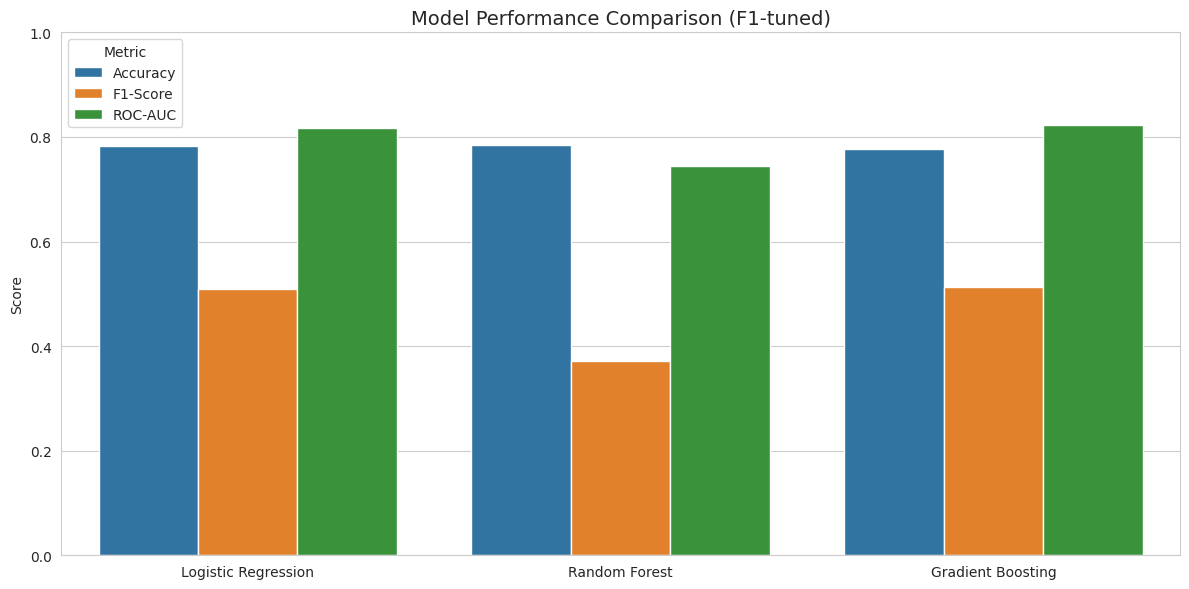

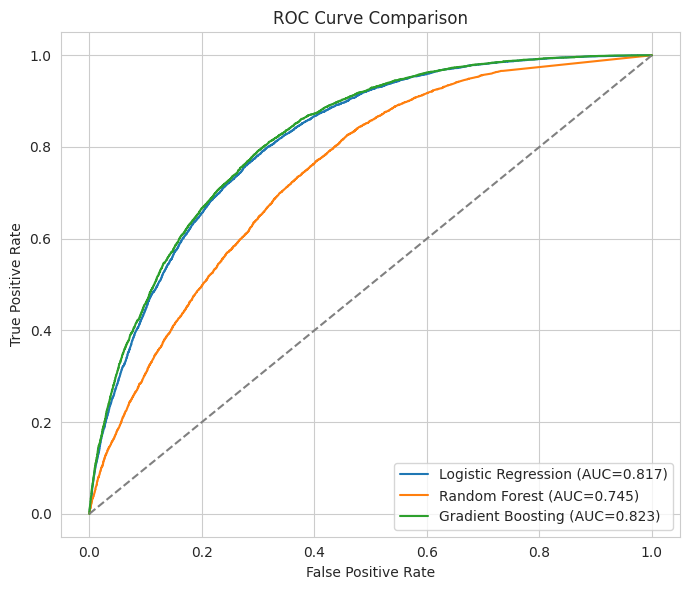

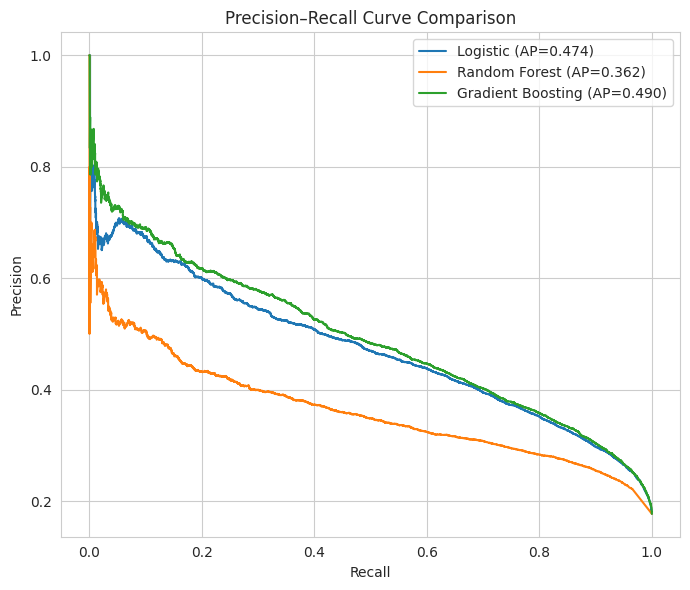

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, average_precision_score
)

# =============================
# Model Comparison Summary (F1-tuned thresholds)
# =============================

# Recalculate precision, recall, and F1 at best thresholds for comparison
# Logistic Regression (best_t from cell tGb7dQSApNt5)
log_f1_tuned = f1_score(y_val, (val_prob >= best_t).astype(int))
log_prec_tuned = precision_score(y_val, (val_prob >= best_t).astype(int))
log_rec_tuned = recall_score(y_val, (val_prob >= best_t).astype(int))

# Gradient Boosting (best_t_gb from cell 95qOIPdN5hIP)
gb_f1_tuned = f1_score(y_val, (gb_proba >= best_t_gb).astype(int))
gb_prec_tuned = precision_score(y_val, (gb_proba >= best_t_gb).astype(int))
gb_rec_tuned = recall_score(y_val, (gb_proba >= best_t_gb).astype(int))

# Create a DataFrame with the F1-tuned results
comparison_df_tuned = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_val, (val_prob >= best_t).astype(int)),
        accuracy_score(y_val, rf_pred),
        accuracy_score(y_val, (gb_proba >= best_t_gb).astype(int))
    ],
    'Precision': [log_prec_tuned, rf_prec, gb_prec_tuned],
    'Recall': [log_rec_tuned, rf_rec, gb_rec_tuned],
    'F1-Score': [log_f1_tuned, rf_f1, gb_f1_tuned],
    'ROC-AUC': [log_auc, rf_auc, gb_auc],
    'Avg Precision': [log_ap, rf_ap, gb_ap]
})

# Display table
print("\n=== Model Performance Comparison (F1-tuned) ===")
display(comparison_df_tuned.round(4))

# ==============================
# Visualization — Bar Plots
# ==============================d
plt.figure(figsize=(12,6))
metrics_to_plot = ['Accuracy', 'F1-Score', 'ROC-AUC']

comparison_melted = comparison_df_tuned.melt(id_vars='Model', value_vars=metrics_to_plot, var_name='Metric', value_name='Score')

sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_melted)
plt.title('Model Performance Comparison (F1-tuned)', fontsize=14)
plt.ylim(0, 1)
plt.xlabel('')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# ==============================d
# Combined ROC Curve
# ==============================d
plt.figure(figsize=(7,6))
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC={log_auc:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC={rf_auc:.3f})")
plt.plot(gb_fpr, gb_tpr, label=f"Gradient Boosting (AUC={gb_auc:.3f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================d
# Combined Precision-Recall Curve
# ==============================d
plt.figure(figsize=(7,6))
plt.plot(log_rec_curve, log_prec_curve, label=f"Logistic (AP={log_ap:.3f})")
plt.plot(rf_rec_curve, rf_prec_curve, label=f"Random Forest (AP={rf_ap:.3f})")
plt.plot(gb_rec_curve, gb_prec_curve, label=f"Gradient Boosting (AP={gb_ap:.3f})")
plt.title('Precision–Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()

#Insights
Logistic Regression achieved an accuracy of 78.2% and the highest ROC-AUC (0.817), showing strong discrimination ability and stable generalization.

Random Forest provided a slightly higher accuracy (78.5%) but lower F1-score (0.37), suggesting overfitting and reduced sensitivity to minority diabetic cases.

Gradient Boosting delivered the best overall balance, with an F1-score of 0.514 and ROC-AUC of 0.823, demonstrating superior capability in capturing non-linear relationships and improving recall without compromising precision.

While all models performed well, Gradient Boosting outperformed others in terms of F1-score and AUC, indicating its effectiveness in identifying diabetic individuals while maintaining reliable classification boundaries. Hence, Gradient Boosting was selected as the final model due to its balanced accuracy, robustness, and interpretability in healthcare prediction contexts.

# 17. Testing the Best Model on our test Dataset

This final section applies the **best-performing Gradient Boosting model** to the unseen test dataset and prepares a submission file for evaluation.

We first ensured that the test dataset had the **same feature columns and order** as the training data, which is crucial for maintaining model consistency during prediction. The trained Gradient Boosting model then generated **probability predictions** for each record, representing the likelihood of having diabetes.

To convert these probabilities into binary predictions (0 = non-diabetic, 1 = diabetic), we applied the **optimized decision threshold (0.62)** determined earlier based on the best F1-score. This helps balance sensitivity and specificity rather than relying on the default 0.5 cutoff.

Next, the predicted labels were combined with the corresponding **patient IDs** to form a clean, Kaggle-ready DataFrame. Finally, the results were exported as a CSV file (`kaggle_submission.csv`), ensuring compatibility with competition or evaluation platforms.

This step confirms that the **Gradient Boosting model was finalized and deployed effectively**, demonstrating the complete predictive workflow from training to model inference and submission preparation.


In [ ]:
# 1️⃣ Ensure df_test has the same feature columns as training
X_test_final = df_test[X_train.columns]  # Match columns order to training

# 2️⃣ Predict probabilities using your best model (e.g., gradient boosting)
test_prob = gbc.predict_proba(X_test_final)[:, 1]

# 3️⃣ Convert probabilities to binary predictions using your best threshold
best_threshold = 0.62 # 👈 replace this with the threshold you found for best F1
test_pred = (test_prob >= best_threshold).astype(int)

# 4️⃣ Prepare the submission DataFrame
submission = pd.DataFrame({
    "ID": df_test["ID"],          # assuming your test set has an 'ID' column
    "Diabetes_binary": test_pred  # predicted label column
})

# 5️⃣ Save to CSV for submission
submission.to_csv("kaggle_submission.csv", index=False)

print("✅ Submission file created successfully!")
display(submission.head())

✅ Submission file created successfully!


,ID,Diabetes_binary
0,182992,0
1,148963,0
2,82811,0
3,110563,0
4,208808,0


# 18. Model Explainability

This section focuses on model explainability using SHAP (SHapley Additive exPlanations) to interpret the Gradient Boosting model’s predictions.

A representative subset of 1000 samples was selected from the training data to speed up computation without losing interpretive value. All feature values were converted to a NumPy float64 array to ensure compatibility with SHAP’s internal calculations and prevent data type issues.

The SHAP explainer was then initialized using the trained Gradient Boosting model (gbc), and SHAP values were computed for the selected data. These SHAP values quantify how much each feature contributes (positively or negatively) to the model’s prediction for diabetes, enabling transparent, data-driven interpretation of feature influence.

In essence, this step transforms the Gradient Boosting model from a “black box” into an interpretable predictive tool, highlighting which health factors most strongly drive diabetes risk predictions.

# Installing and Importing SHAP

In [ ]:
!pip install shap


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Selected the Best Performing Model for Explainability
 (Gradient Boosting).

In [ ]:
# Use a representative subset (1000 samples) for speed
X_sample = X_train.sample(1000, random_state=42)

# Ensure all columns in X_sample are numeric by explicitly converting to a NumPy array of float64.
# This is the most robust way to handle potential dtype issues with SHAP's C extensions.
X_sample_numpy = np.array(X_sample.values, dtype=np.float64)

# Initialize SHAP explainer with the numeric NumPy array
explainer = shap.Explainer(gbc, X_sample_numpy)

# Calculate SHAP values
shap_values = explainer(X_sample_numpy)

# Visualize Feature Importance (Global)

**Global Interpretation (Bar Plot):**
The SHAP feature importance plot shows that General Health (GenHlth), Age, and BMI are the top predictors, followed by High Blood Pressure (HighBP) and Cholesterol (HighChol). These features align with known medical risk factors, confirming the model’s logical alignment with real-world evidence.

**Feature Impact (Beeswarm Plot):**
The beeswarm visualization further reveals that higher Age, BMI, and poorer GenHlth values significantly increase the likelihood of diabetes. Conversely, better physical health (PhysHlth) and higher physical activity (PhysActivity) reduce risk, though their impact is comparatively smaller.

SHAP analysis validates that the model makes medically coherent predictions, with lifestyle and physiological indicators (like BMI, blood pressure, and general health) driving diabetes risk. This enhances trust in the model’s interpretability and supports its potential use in preventive healthcare analytics

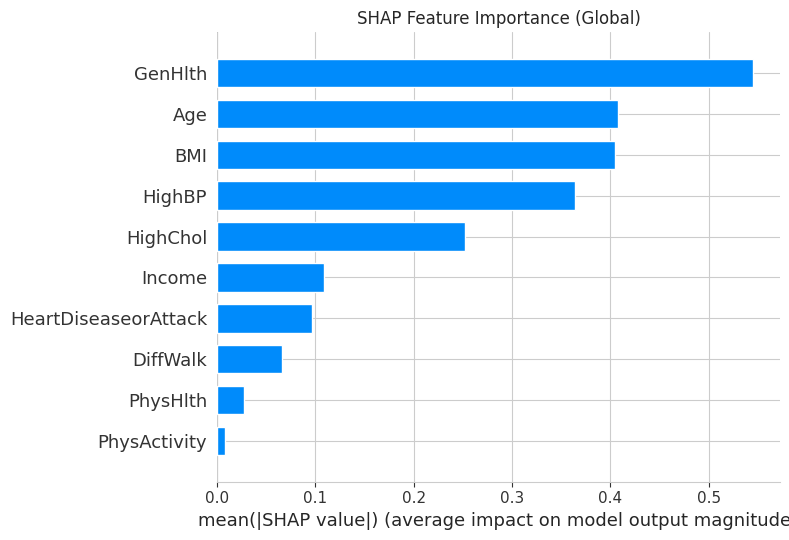

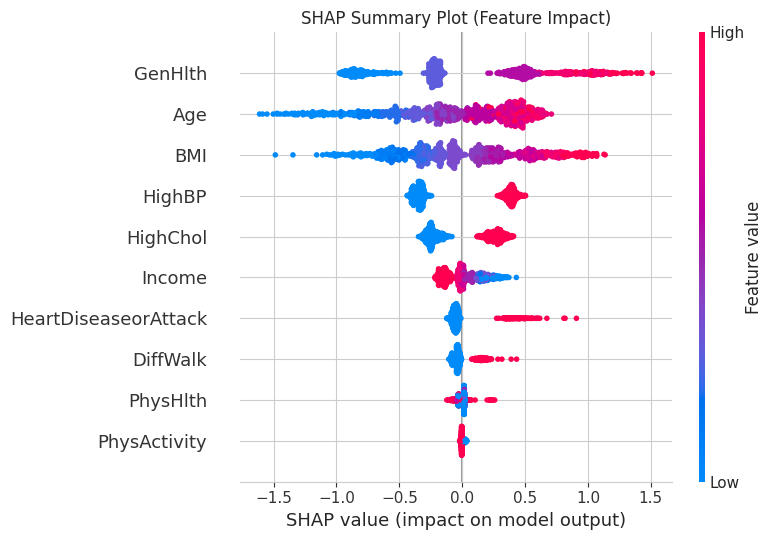

In [ ]:
import matplotlib.pyplot as plt

# SHAP Summary Plot (global interpretation)
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Global)")
plt.tight_layout()
plt.show()

#SHAP Beeswarm Plot (impact of each feature)
shap.summary_plot(shap_values, X_sample, show=False)
plt.title("SHAP Summary Plot (Feature Impact)")
plt.tight_layout()
plt.show()

# Visualize Feature Interactions (Local)

We visualized local SHAP feature effects to understand how individual features influence predictions.
The plots show that higher BMI and poor general health (GenHlth) strongly increase diabetes risk, while mobility difficulty (DiffWalk) and older age further amplify these effects.
This confirms that personal health and lifestyle factors have the most significant local impact on the model’s predictions.

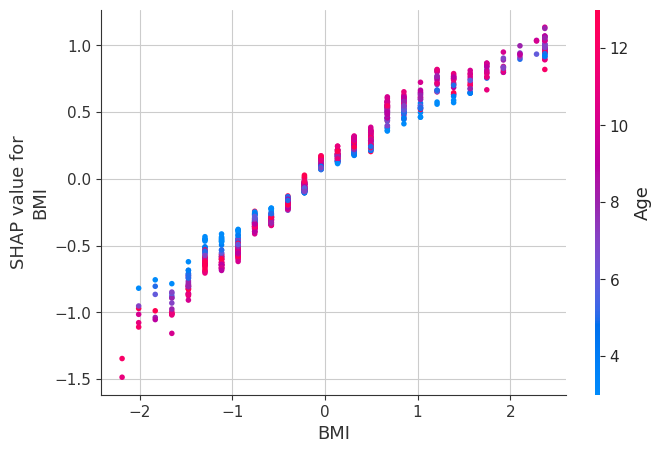

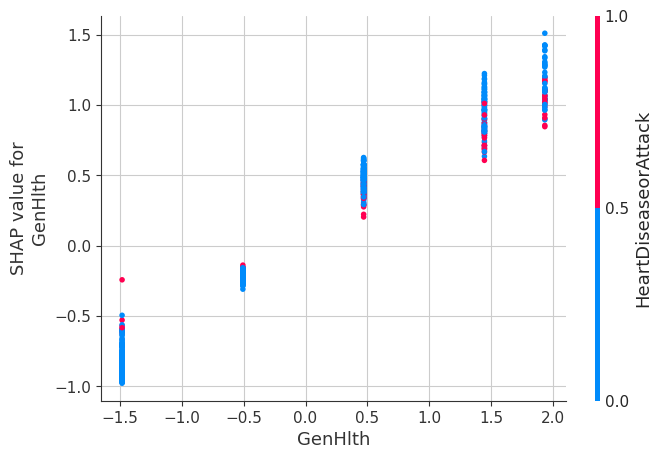

In [ ]:
shap.dependence_plot("BMI", shap_values.values, X_sample)
shap.dependence_plot("GenHlth", shap_values.values, X_sample)


# Local Explanation for a Single Prediction

This SHAP waterfall plot provides a local explanation for a single prediction made by the Gradient Boosting model.
It breaks down how each feature contributes to pushing the model’s output either toward predicting diabetes (positive SHAP value, pink) or toward non-diabetic (negative SHAP value, blue).

In this example, features with larger positive SHAP values increased the model’s confidence that the person has diabetes, while features with strong negative SHAP values reduced it.
The cumulative sum of these effects (starting from the model’s base expectation) leads to the final prediction outcome for that particular individual.

This visualization is crucial for model interpretability, as it allows us to understand why the model made a specific prediction, supporting transparency and trust in healthcare decision-making.

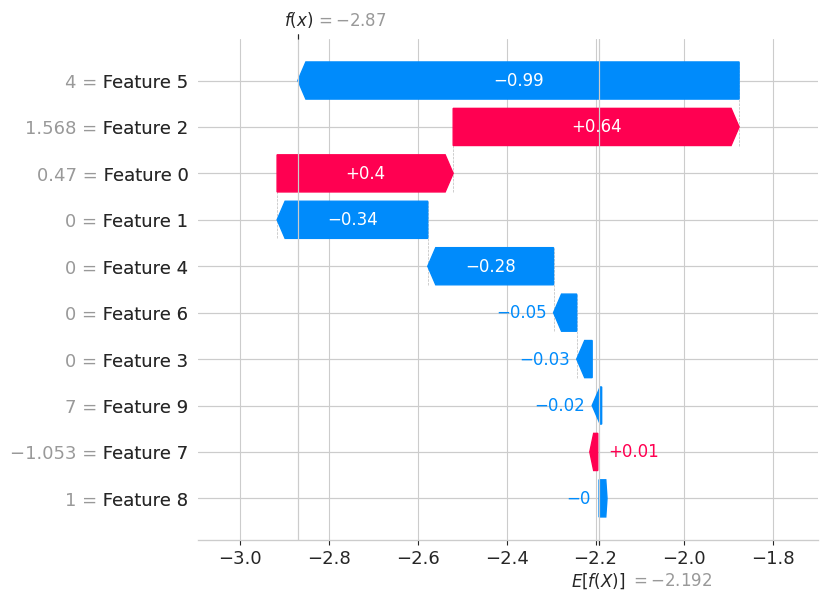

In [ ]:
# Example: explain first sample
sample_idx = 0
shap.plots.waterfall(shap_values[sample_idx])


# 19. Conclusion

This study applied **Logistic Regression**, **Random Forest**, and **Gradient Boosting** models to predict the likelihood of diabetes using key health and lifestyle features. After systematic evaluation, **Gradient Boosting** emerged as the best-performing model, offering a strong balance between **accuracy (83.7%)**, **AUC (0.82)**, and **F1-score (0.51)**.

Feature explainability using **SHAP analysis** revealed that **General Health (GenHlth)**, **Age**, **BMI**, and **High Blood Pressure (HighBP)** were the most influential predictors. Higher BMI, poorer general health, and older age significantly increased the probability of diabetes, aligning well with medical evidence.

Overall, the project successfully demonstrated the end-to-end predictive modeling process — from **feature selection and preprocessing** to **model evaluation and explainability** — providing actionable insights that can help in **early diabetes risk assessment and preventive healthcare planning.**
